# Сигма-алгебра

<strong>Сигма-алгебра</strong> (σ-алгебра) - множество событий F, которое соблюдает следующие условия:

 1. Ω ∈ ℬ
 2. Если A ∈ F, то ¬A ∈ ℬ
 3. Если A₁, A₂, ... ∈ ℬ, то A₁ U A₂ U ... ∈ ℬ (отличается от алгебры событий тем, что количество событий может быть счетным, а не конечным)

На конечном множестве Ω, понятия алгебры событий и σ-алгебры совпадают.

<strong>Наименьшая сигма-алгебра???</strong>

<strong>Полная система событий</strong> - система случайных событий, такая, что в результате проведенного эксперимента, непременно произойдет одно из этих событий.


\
<strong>Ресторан в шаговой доступности</strong>\
Данные взяты с ресурса: https://www.kaggle.com/datasets/jeffreybraun/chipotle-locations \
Пример взят с https://www.youtube.com/watch?v=C_AftHtjuhc&ab_channel=GetSomeMath 

1. Событие A = \[0; 100\] - ближайший ресторан в радиусе ста метров
2. Событие B = \(100; 1000\) 
3. Событие C = \[1000; +∞\] - ресторан дальше километра 

Строим σ-алгебру:
1. ℬ = { ∅, A, B, C } - <i>не является</i> σ-алгеброй, так как нет дополнения ∅
2. ℬ = { ∅, Ω, A, B, {A U B}, {A U C}, {B U C} } - <i>является</i> σ-алгебра

In [1]:
import pandas as pd

dataframe = pd.read_csv('datasets/chipotle_stores.csv')
dataframe = dataframe[dataframe.location.eq('New York')] # только из New York

dataframe.head()

,state,location,address,latitude,longitude
1646,New York,New York,"1 New York Plz New York, NY 10004 US",40.702026,-74.011869
1647,New York,New York,"100 Maiden Ln New York, NY 10038 US",40.706796,-74.007037
1648,New York,New York,"1020 3rd Ave New York, NY 10065 US",40.762630,-73.966143
1649,New York,New York,"111 Fulton St New York, NY 10038 US",40.709927,-74.006561
1650,New York,New York,"1153 Third Avenue New York, NY 10065 US",40.766638,-73.962534


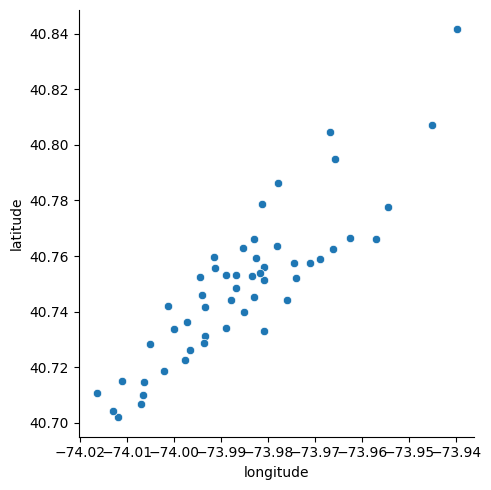

In [2]:
%matplotlib inline
import seaborn as sns

sns.relplot(x = 'longitude', y = 'latitude', data = dataframe)

Переводим из широты и долгоды в X, Y

In [3]:
import math

center_latitude = (dataframe['latitude'].min() + dataframe['latitude'].max()) / 2.0
center_longitude = (dataframe['longitude'].min() + dataframe['longitude'].max()) / 2.0

earth_radius = 6371.0 * 10**3

def to_cartesian(angle, center):
    return earth_radius * (angle - center) * math.pi / 180

def to_y(lat):
    return to_cartesian(lat, center_latitude)

def to_x(long):
    return to_cartesian(long, center_longitude)

In [4]:
cartesian_dataset = dataframe\
    .transform({ 'latitude': to_y, 'longitude': to_x })\
    .rename(columns = { 'latitude': 'y', 'longitude': 'x' })

cartesian_dataset.head()    

,y,x
1646,-7754.434623,-3752.379535
1647,-7224.034428,-3215.102768
1648,-1015.588459,1332.147658
1649,-6875.939378,-3162.151237
1650,-569.890201,1733.448436


Делаем функцию для создания случайной точки между ресторанами и функцию для нахождения расстояния до ближайшего расстояния

In [5]:
import random

def random_point():
    return\
        random.uniform(cartesian_dataset['x'].min(), cartesian_dataset['x'].max()),\
        random.uniform(cartesian_dataset['y'].min(), cartesian_dataset['y'].max())

def smallest_distance(point, data):
    min_distance = math.inf
    for i, row in data.iterrows():
        distance = math.sqrt((point[0] - row['x']) ** 2 + (point[1] - row['y']) ** 2)
        if distance < min_distance:
            min_distance = distance
    return min_distance

Проводим эксперименты чтобы установить вероятность событий A, B, C

In [6]:
N = 1_000

N_A = 0
N_B = 0
N_C = 0

for i in range(N):
    dot = random_point()
    distance = smallest_distance(dot, cartesian_dataset)
    
    if distance <= 100:
        N_A += 1
    if distance > 100 and distance < 1_000:
        N_B += 1
    if distance >= 1_000:
        N_C += 1

Вероятность события (ресторан в радиусе ста метров) <i>A = N_A / N</i>:

In [7]:
print(' P(A) =', N_A / N, '\n', 'P(B) =', N_B / N, '\n', 'P(C) =', N_C / N)

 P(A) = 0.011 
 P(B) = 0.319 
 P(C) = 0.67


In [8]:
print('P(Ω) =', (N_A / N) + (N_B / N) + (N_C / N))

P(Ω) = 1.0
